C:\Users\최지원\AppData\Local\Temp\ipykernel_6540\160502672.py:23: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='cp949')


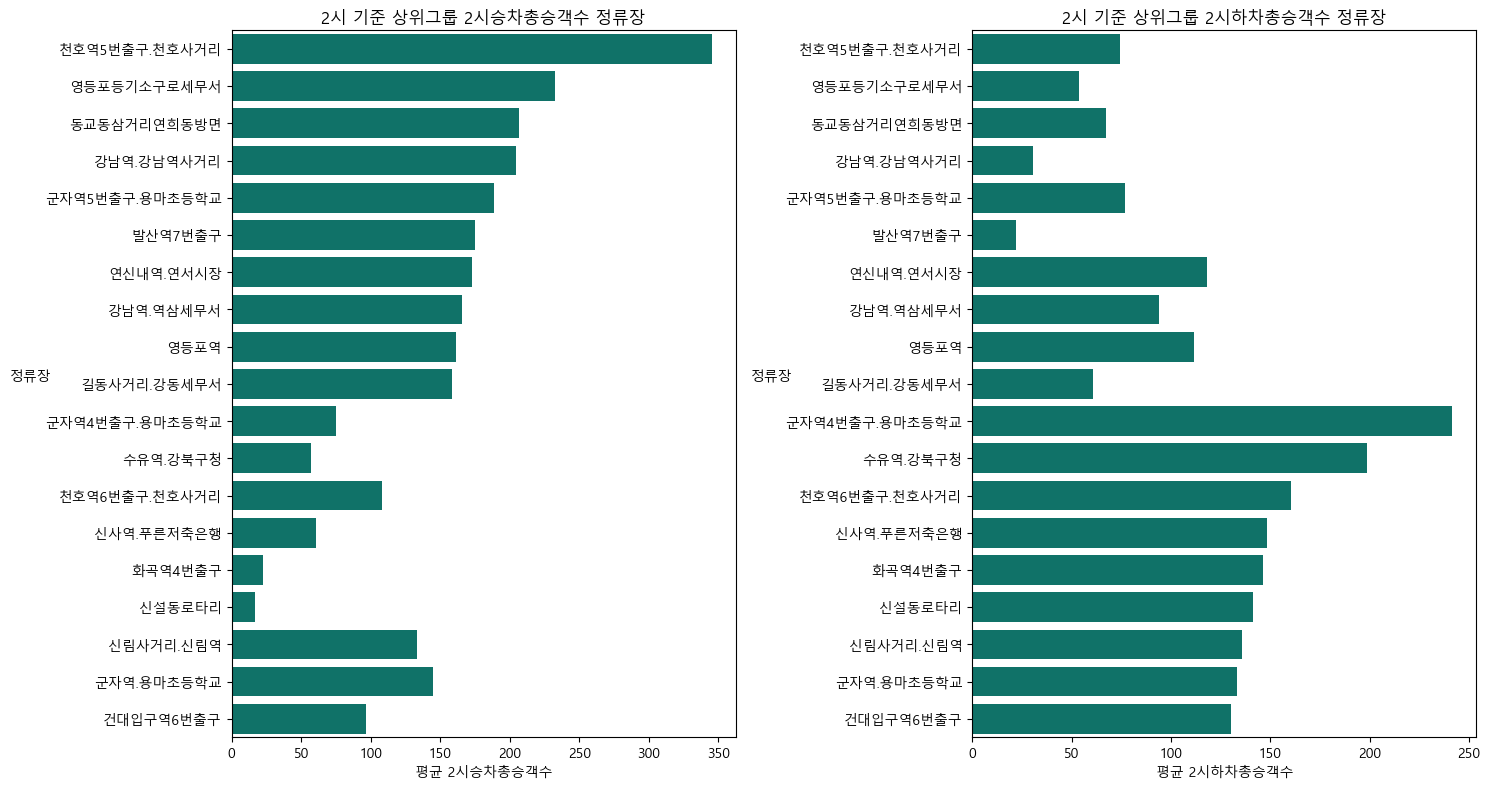

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\최지원\Downloads\학교\빅데이터\새 폴더\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

df_list = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# 정류장 이름에서 괄호와 숫자 제거
merged_df['역명'] = merged_df['역명'].str.replace(r'\(\d+\)', '', regex=True)

# 필요한 컬럼 선택
columns_of_interest = ['역명', '2시승차총승객수', '2시하차총승객수']
subset_df = merged_df[columns_of_interest]

# 같은 이름의 정류장을 그룹화하고 각 시간대별로 평균 구하기
grouped_df = subset_df.groupby('역명')[['2시승차총승객수', '2시하차총승객수']].mean()

# 각 시간대별로 상위 10개 정류장 추출
top_10_stations_by_hour = pd.DataFrame()

# 1시 기준 상위 10개 정류장 추출
top_stations_boarding = grouped_df.sort_values(by='2시승차총승객수', ascending=False).head(10)
top_stations_alighting = grouped_df.sort_values(by='2시하차총승객수', ascending=False).head(10)

# 결과 데이터프레임에 추가
top_10_stations_by_hour = pd.concat([top_10_stations_by_hour, top_stations_boarding, top_stations_alighting])

# 그래프 시각화
plt.figure(figsize=(15, 8))

for i, col in enumerate(['2시승차총승객수', '2시하차총승객수']):
    # 해당 시간대의 상위 10개 정류장 추출
    top_stations = top_10_stations_by_hour[top_10_stations_by_hour[col] > 0]
    
    # 그래프 생성
    plt.subplot(1, 2, i + 1)
    sns.barplot(x=col, y=top_stations.index, data=top_stations, color='#002D56')
    plt.title(f'2시 기준 상위그룹 {col} 정류장')
    plt.xlabel(f'평균 {col}')
    plt.ylabel('정류장', rotation=0, labelpad=10)

plt.tight_layout()
plt.show()